In [1]:

import numpy as np
import jax.numpy as jnp

from scoobpsf.imshows import *
import scoobpsf.jax_scoob as jscoob
import scoobpsf.jax_dm as jdm

from importlib import reload

Jax platform: gpu
Jax device: NVIDIA A100 80GB PCIe


In [2]:
!nvidia-smi

Fri Sep 22 09:20:03 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe           On | 00000000:25:00.0 Off |                    0 |
| N/A   33C    P0               64W / 300W|   3207MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [4]:
from astropy.io import fits
inf_cube = fits.getdata('inf_cube.fits')
inf_sampling = fits.getheader('inf_cube.fits')['SAMPLING']

In [33]:
reload(jdm)
DM = jdm.DeformableMirror(inf_cube='inf_cube.fits')

In [18]:
reload(jdm)
DM = jdm.DeformableMirror(inf_cube=inf_cube, inf_sampling=inf_sampling)

hit this


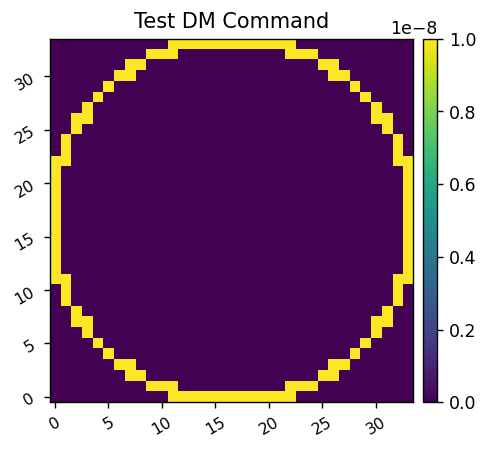

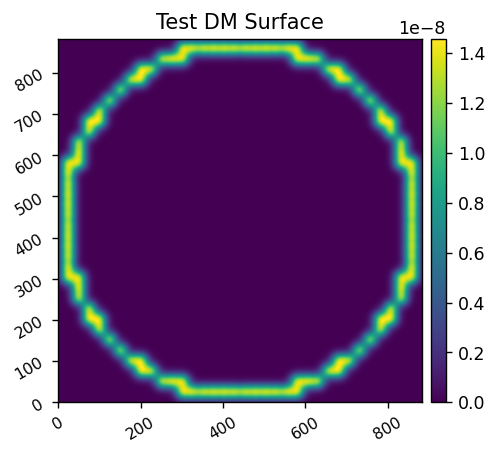

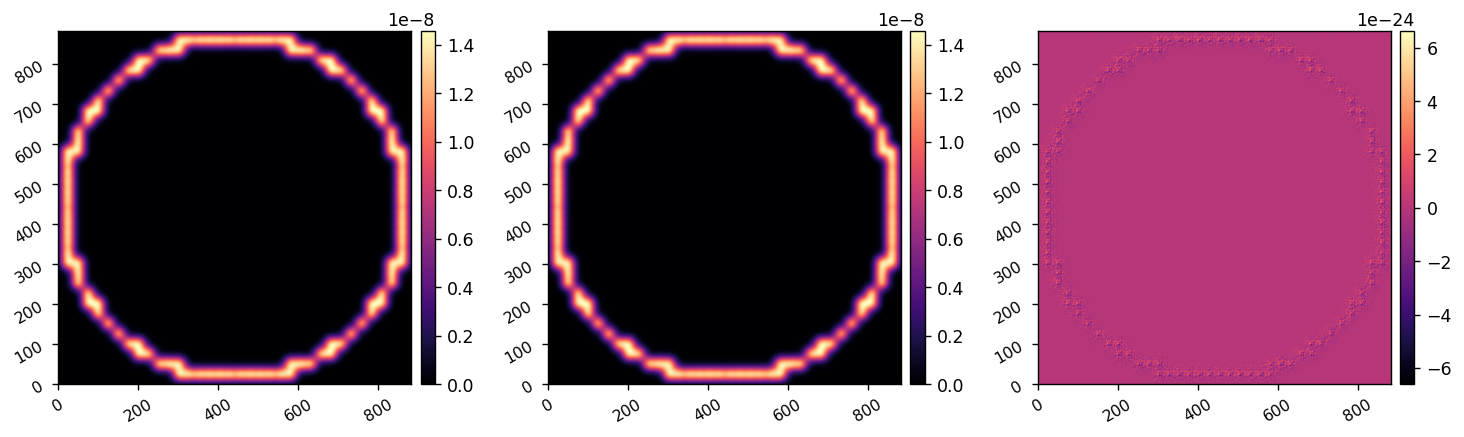

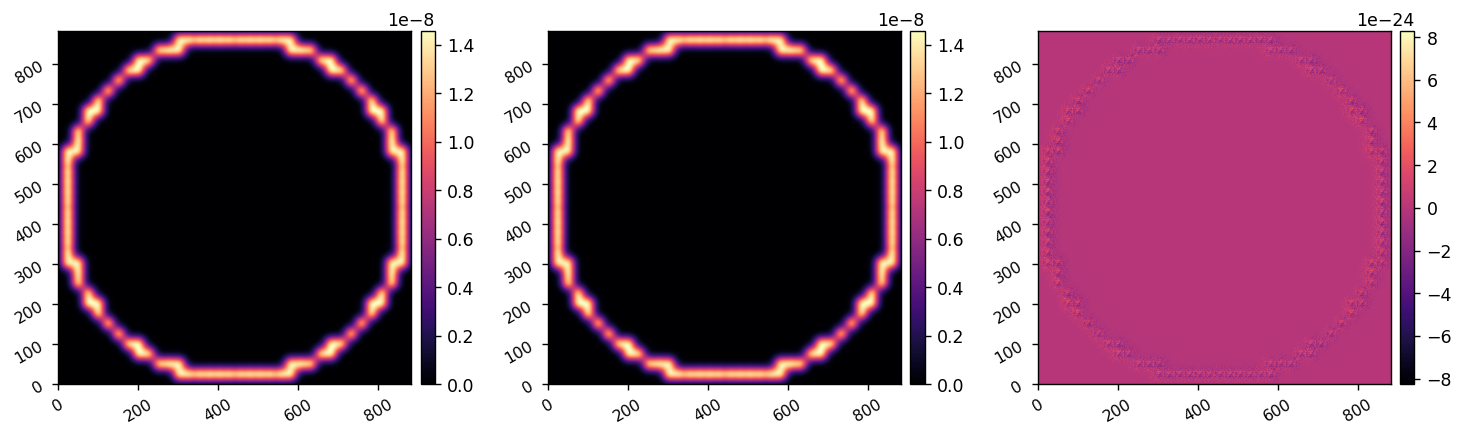

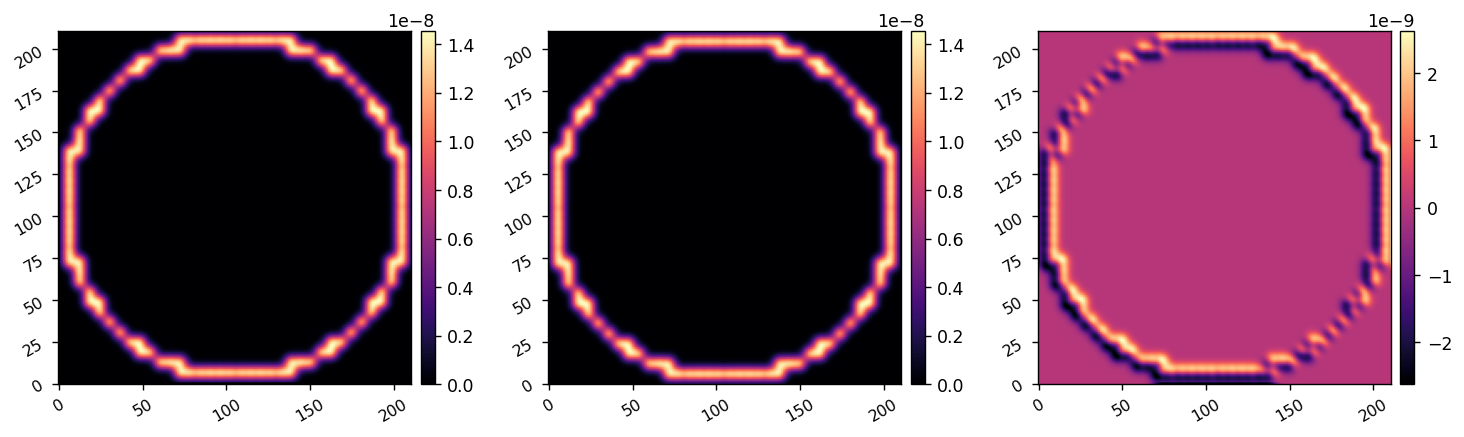

In [19]:
xx = (np.linspace(0, DM.Nact-1, DM.Nact) - DM.Nact/2 + 1/2) * DM.act_spacing.to(u.mm).value*2
x,y = np.meshgrid(xx,xx)
r = np.sqrt(x**2 + y**2)
ring_command = np.asarray((r<10.5)*(r>9.8), dtype=np.float64)
ring_command *= 1e-8
DM.command = jnp.array(ring_command)
imshow1(np.asarray(DM.command), 'Test DM Command', cmap='viridis')

test_surf = np.asarray(DM.get_surface())
imshow1(test_surf, 'Test DM Surface', cmap='viridis')

imshow3(test_surf, test_surf.T, test_surf-test_surf.T )

imshow3(test_surf, np.flipud(np.fliplr(test_surf)), test_surf-np.flipud(np.fliplr(test_surf)) )

test_surf = np.asarray(DM.get_surface(pixelscale=50*u.um/u.pix))
imshow3(test_surf, np.flipud(np.fliplr(test_surf)), test_surf-np.flipud(np.fliplr(test_surf)) )


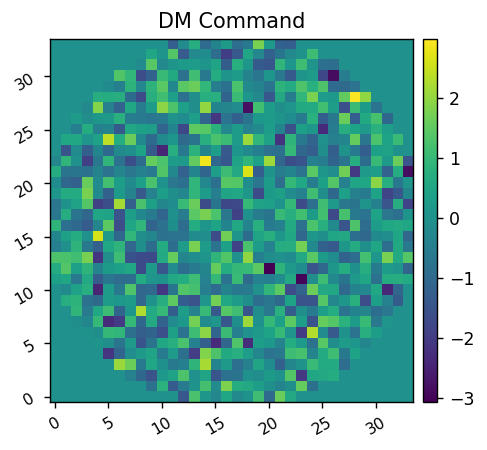

In [37]:
DM.actuators = jnp.array(np.random.randn(DM.Nacts))
imshow1(np.asarray(DM.command), 'DM Command', cmap='viridis')

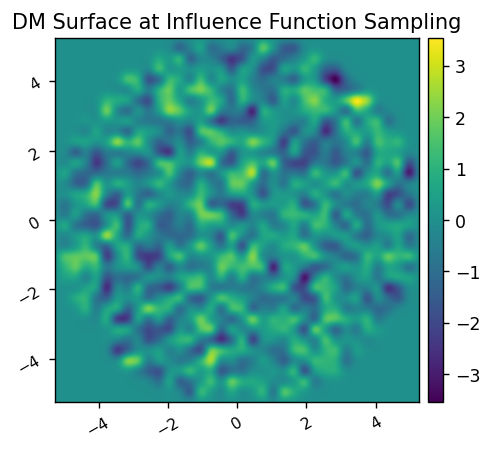

In [38]:
surf = np.asarray(DM.get_surface())
imshow1(surf, 'DM Surface at Influence Function Sampling',
        pxscl=DM.inf_pixelscale.to(u.mm/u.pix), cmap='viridis')

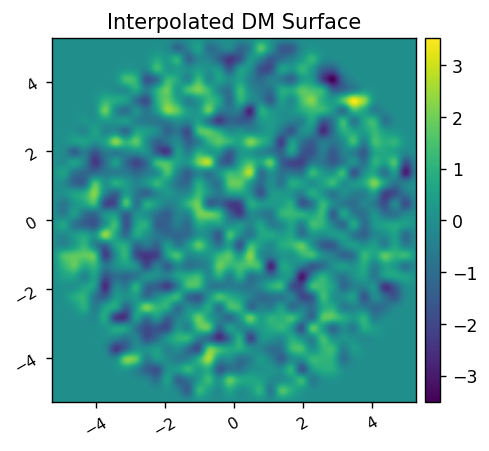

In [39]:
surf_pxscl = 50*u.um/u.pix
interpped_surf = np.asarray(DM.get_surface(pixelscale=surf_pxscl))
imshow1(interpped_surf, 'Interpolated DM Surface',
        pxscl=surf_pxscl.to(u.mm/u.pix), cmap='viridis')